In [5]:
import re

import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms

import cv2
import numpy as np
import shutil
import pandas as pd
import ast
import os
import matplotlib.pyplot as plt

from gan.dcgan import predict_validate


class GeneExpressionImageDataset(Dataset):
    def __init__(self, gene_expressions, image_paths, transform=None):
        self.gene_expressions = gene_expressions
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.gene_expressions)

    def __getitem__(self, idx):
        gene_expression = self.gene_expressions[idx]

        # Load the image
        image = Image.open(self.image_paths[idx])
        if self.transform:
            image = self.transform(image)

        gene_expression = torch.tensor(gene_expression, dtype=torch.float32)

        return gene_expression, image


transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
image_paths = ['data/image/spots_test/test/0.jpg', 'data/image/spots_test/test/1.jpg',
               'data/image/spots_test/test/2.jpg', 'data/image/spots_test/test/3.jpg',
               'data/image/spots_test/test/4.jpg']
gene_expressions = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]]
dataset = GeneExpressionImageDataset(gene_expressions=gene_expressions, image_paths=image_paths, transform=transform)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=1)



In [36]:
for i, data in enumerate(dataloader, 0):
    gene_expressions, images = data
    print("Gene Expression Batch Shape:", gene_expressions)
    print("Image Batch Shape:", images.shape)


Gene Expression Batch Shape: tensor([[ 4.,  5.,  6.],
        [10., 11., 12.]])
Image Batch Shape: torch.Size([2, 3, 256, 256])
Gene Expression Batch Shape: tensor([[13., 14., 15.],
        [ 1.,  2.,  3.]])
Image Batch Shape: torch.Size([2, 3, 256, 256])
Gene Expression Batch Shape: tensor([[7., 8., 9.]])
Image Batch Shape: torch.Size([1, 3, 256, 256])


In [3]:
import random

random_elements = random.sample(range(1, 1001), 500)

In [12]:
import pandas as pd

df = pd.read_csv('data/gene_expression/data_test.csv')
test_df = df.iloc[random_elements]
list(set(test_df['patient'].values.tolist()))

['F', 'D', 'E', 'G', 'A', 'C', 'B', 'H']

In [20]:
test_df.to_csv('data/gene_expression/data_test2.csv', index=False)

In [13]:
another_index = [i for i in range(1000) if i not in random_elements]
validation_df = df.iloc[another_index]
list(set(validation_df['patient'].values.tolist()))

['F', 'D', 'E', 'G', 'A', 'C', 'B', 'H']

In [10]:
validation_df.to_csv('data/gene_expression/data_validation.csv', index=False)

In [18]:
import shutil

for i, index in enumerate(another_index):
    shutil.copy('data/image/spots_test/test/' + str(index) + '.jpg',
                'data/image/spots_validation/validation_wgan_gp/' + str(i) + '.jpg')

In [ ]:
import shutil

for i, index in enumerate(another_index):
    shutil.copy('data/image/spots_test/test/' + str(index) + '.jpg',
                'data/image/spots_validation/validation_wgan_gp/' + str(i) + '.jpg')

In [19]:
import shutil

for i, index in enumerate(random_elements):
    shutil.copy('data/image/spots_test/test/' + str(index) + '.jpg', 'data/image/spots_test/test2/' + str(i) + '.jpg')

In [21]:
df.shape

(1000, 3)

In [22]:
df_train = pd.read_csv('data/gene_expression/data_train.csv')

In [24]:
new_df_train = pd.concat([df_train, df])
new_df_train.shape, df_train.shape


((13619, 3), (12619, 3))

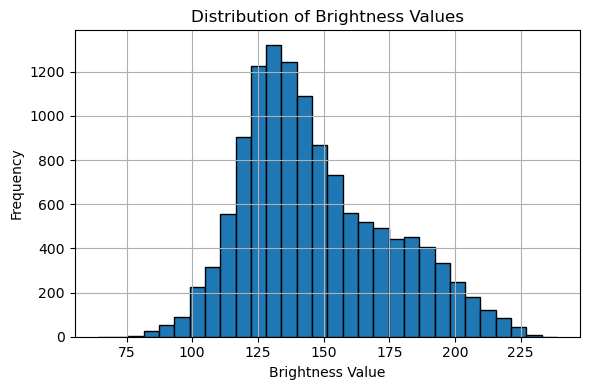

In [42]:
images = os.listdir('data/image/spots_train/train')
value_brightness = []
for i in images:
    image = cv2.imread(f"data/image/spots_train/train/{i}", cv2.IMREAD_GRAYSCALE)
    average_brightness = np.mean(image)
    value_brightness.append((i, average_brightness))

brightness_values = \
    [item[1] for item in value_brightness]

plt.figure(figsize=(6, 4))
plt.hist(brightness_values, bins=30, edgecolor='black')
plt.xlabel('Brightness Value')
plt.ylabel('Frequency')
plt.title('Distribution of Brightness Values')
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
brightness_values = [item[1] for item in value_brightness]
quantile_95 = np.percentile(brightness_values, 99)

print(f"95th percentile of brightness values: {quantile_95}")

95th percentile of brightness values: 216.31053527832032


In [43]:
image_dir = 'data/image/spots_train/train'
bright_images = []

for img_name in images:
    img_path = os.path.join(image_dir, img_name)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    average_brightness = np.mean(image)
    if average_brightness > 225:
        bright_images.append((img_name, average_brightness))

bright_images.sort(key=lambda x: x[1], reverse=True)


In [44]:
x = ast.literal_eval(df.iloc[5587]['gene_expression'])
x.count(0) / 2048 * 100

19.04296875

In [2]:
from gan.dcgan import predict_validate

predict_validate('/home/anlt69/Downloads/model_epoch_400.h5')

In [12]:
from scipy.stats import zscore
import pandas as pd
import ast
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt


def load_gene_expression(data_path='data.csv'):
    df = pd.read_csv(data_path)
    gene_expression = df['gene_expression']
    new_gene_expression = []

    for i in range(len(gene_expression)):
        try:
            row = ast.literal_eval(gene_expression[i])
            row = np.array(row)
            new_gene_expression.append(row)
        except Exception as e:
            print('error:', e)

    gene_expression = np.array(new_gene_expression)
    return gene_expression

gene_expression = load_gene_expression('data/gene_expression/data_test.csv')

Spot1: 0.30347099511411413 0.3568064891265154
Spot1 Z-score: -2.7755575615628914e-17 0.9999999999999998


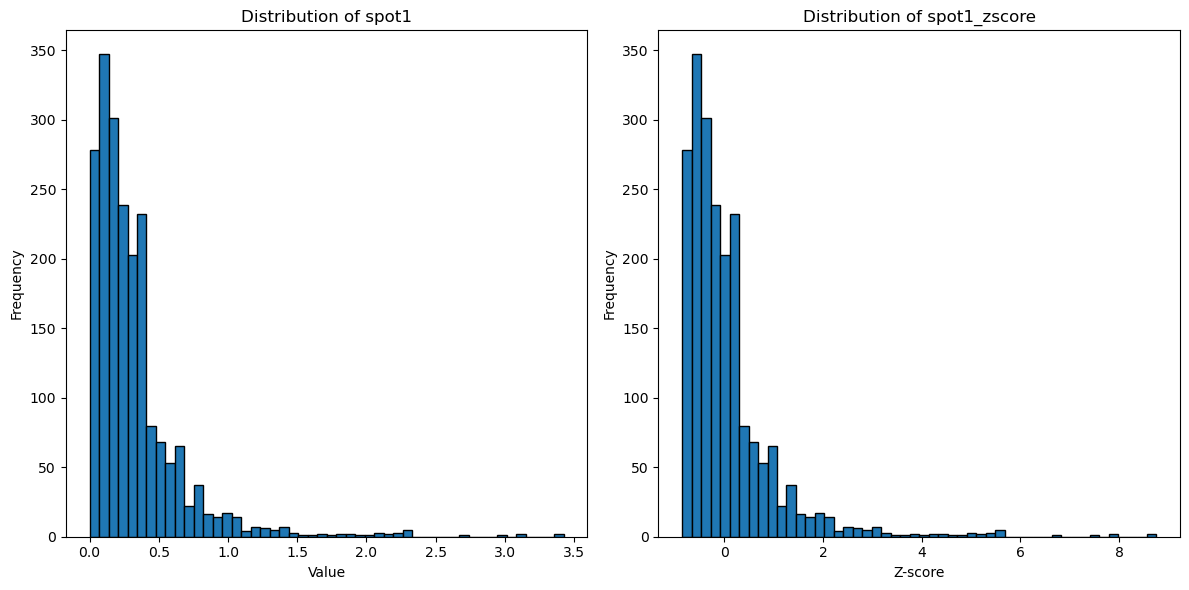

In [25]:
spot1 = gene_expression[8]
spot1_zscore = zscore(spot1)
print('Spot1:', spot1.mean(), spot1.std())
print('Spot1 Z-score:', spot1_zscore.mean(), spot1_zscore.std())

plt.figure(figsize=(12, 6))

# Plot the distribution of spot1
plt.subplot(1, 2, 1)
plt.hist(spot1, bins=50, edgecolor='black')
plt.title('Distribution of spot1')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot the distribution of spot1_zscore
plt.subplot(1, 2, 2)
plt.hist(spot1_zscore, bins=50, edgecolor='black')
plt.title('Distribution of spot1_zscore')
plt.xlabel('Z-score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [18]:
index = [442, 731, 2726, 2994, 3495, 3563, 3713, 5662]

df = df.drop(index)
print(df.shape)
df.to_csv('data/gene_expression/data_train.csv', index=False)

(12611, 3)


In [6]:
images = ['data/image/spots_train/train/' + str(i) + '.jpg' for i in range(12619)]
index = [442, 731, 2726, 2994, 3495, 3563, 3713, 5662]
for i in index:
    images.remove('data/image/spots_train/train/' + str(i) + '.jpg')
len(images)

for i in range(12611):
    shutil.copy(images[i], 'data/image/spots_train/train/' + str(i) + '.jpg')


In [8]:
import os
import pandas as pd
len(os.listdir('data/image/spots_train/train'))

df = pd.read_csv('data/gene_expression/data_train.csv')
df.shape

(12611, 3)

In [34]:
# Concatenate images vertically
from PIL import Image
for i in range(500):
    img1 = Image.open(f'/home/anlt69/Downloads/GAN_model_13Nov2024/gan_model/data/image_1/spots_validation/validation/{i}.jpg')
    img2 = Image.open(f'/home/anlt69/Downloads/SD_12Nov2024_fake/fake_image_{i+1}.png')
    concat_img = Image.new('RGB', (img1.width + img2.width, max(img1.height, img2.height)))
    concat_img.paste(img1, (0, 0))
    concat_img.paste(img2, (img1.width, 0))
    
    # Save the concatenated image
    concat_img.save(f'result/validation_diffusion/image_{i}.jpg')

In [ ]:
concat_img = Image.new('RGB', (img1.width + img2.width, max(img1.height, img2.height)))
concat_img.paste(img1, (0, 0))
concat_img.paste(img2, (img1.width, 0))
